## Imports & Settings

In [1]:
# Update working directory to parent so that we may use our custom functions
import os
os.chdir('..')
os.getcwd( )

import re
import pandas as pd

# pred comparison for heatmap
from sklearn.metrics import accuracy_score
from results_utils.utils_eda import *

## Load Model Results Dataset

In [2]:
results_df = pd.read_csv('04_results/results_target.csv', converters={'predictions': pd.eval})
results_df.head()

,model_name,model_epoch,test_accuracy,test_f1,predictions
0,control_iSarcasm_01,E01_A0.75_F0.41,0.835714,0.454976,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,control_iSarcasm_01,E02_A0.77_F0.39,0.825714,0.452915,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,control_iSarcasm_01,E03_A0.75_F0.45,0.784286,0.430189,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,control_iSarcasm_01,E04_A0.76_F0.5,0.757857,0.402116,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,control_iSarcasm_01,E05_A0.74_F0.45,0.768571,0.408759,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


## Adjust Dataset

In order to better visualize our data, we need to prep the dataset--particularly the name column.

In [3]:
# adjust model name into category
results_df['model_cat'] = results_df['model_name'].apply(lambda x: re.sub(r'_\d+$', '', x))

results_df.head()

,model_name,model_epoch,test_accuracy,test_f1,predictions,model_cat
0,control_iSarcasm_01,E01_A0.75_F0.41,0.835714,0.454976,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",control_iSarcasm
1,control_iSarcasm_01,E02_A0.77_F0.39,0.825714,0.452915,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm
2,control_iSarcasm_01,E03_A0.75_F0.45,0.784286,0.430189,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm
3,control_iSarcasm_01,E04_A0.76_F0.5,0.757857,0.402116,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm
4,control_iSarcasm_01,E05_A0.74_F0.45,0.768571,0.408759,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm


In [4]:
# adjust cat names for plot display
results_df['model_display_name'] = results_df['model_cat'].map(lambda x: x.removeprefix('iSarcasm_'))
results_df['model_display_name'] = results_df['model_display_name'].map(lambda x: x.removeprefix('target-iSarcasm_inter-'))
results_df.tail()

,model_name,model_epoch,test_accuracy,test_f1,predictions,model_cat,model_display_name
175,target-iSarcasm_inter-HellaSwag_03,E06_A0.75_F0.35,0.820000,0.357143,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",target-iSarcasm_inter-HellaSwag,HellaSwag
176,target-iSarcasm_inter-HellaSwag_03,E07_A0.76_F0.28,0.832143,0.341737,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",target-iSarcasm_inter-HellaSwag,HellaSwag
177,target-iSarcasm_inter-HellaSwag_03,E08_A0.74_F0.27,0.847143,0.408840,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",target-iSarcasm_inter-HellaSwag,HellaSwag
178,target-iSarcasm_inter-HellaSwag_03,E09_A0.75_F0.4,0.782857,0.361345,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",target-iSarcasm_inter-HellaSwag,HellaSwag
179,target-iSarcasm_inter-HellaSwag_03,E10_A0.75_F0.32,0.815714,0.391509,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",target-iSarcasm_inter-HellaSwag,HellaSwag


In [5]:
# TODO , do we want to sort by display name??
# sort the dataset by model name for consistency 
results_df = results_df.sort_values('model_display_name', ascending=True, key=lambda col: col.str.lower())
results_df

,model_name,model_epoch,test_accuracy,test_f1,predictions,model_cat,model_display_name
0,control_iSarcasm_01,E01_A0.75_F0.41,0.835714,0.454976,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",control_iSarcasm,control_iSarcasm
28,control_iSarcasm_03,E09_A0.75_F0.35,0.827857,0.404938,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
27,control_iSarcasm_03,E08_A0.77_F0.39,0.812143,0.411633,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
26,control_iSarcasm_03,E07_A0.76_F0.45,0.741429,0.382253,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
25,control_iSarcasm_03,E06_A0.78_F0.41,0.808571,0.407080,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
...,...,...,...,...,...,...,...
93,target-iSarcasm_inter-XED-fine_01,E04_A0.76_F0.43,0.776429,0.377734,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",target-iSarcasm_inter-XED-fine,XED-fine
92,target-iSarcasm_inter-XED-fine_01,E03_A0.79_F0.42,0.826429,0.438799,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",target-iSarcasm_inter-XED-fine,XED-fine
91,target-iSarcasm_inter-XED-fine_01,E02_A0.76_F0.46,0.760714,0.402852,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...",target-iSarcasm_inter-XED-fine,XED-fine
103,target-iSarcasm_inter-XED-fine_02,E04_A0.79_F0.33,0.827143,0.349462,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",target-iSarcasm_inter-XED-fine,XED-fine


In [6]:
# adjust scores to 0-100 scale for percent representation
results_df['test_f1'] = results_df['test_f1']*100
results_df['test_accuracy'] = results_df['test_accuracy']*100

results_df.head()

,model_name,model_epoch,test_accuracy,test_f1,predictions,model_cat,model_display_name
0,control_iSarcasm_01,E01_A0.75_F0.41,83.571429,45.497630,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",control_iSarcasm,control_iSarcasm
28,control_iSarcasm_03,E09_A0.75_F0.35,82.785714,40.493827,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
27,control_iSarcasm_03,E08_A0.77_F0.39,81.214286,41.163311,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
26,control_iSarcasm_03,E07_A0.76_F0.45,74.142857,38.225256,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm
25,control_iSarcasm_03,E06_A0.78_F0.41,80.857143,40.707965,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",control_iSarcasm,control_iSarcasm


In [7]:
results_df['model_display_name'].unique()

array(['control_iSarcasm', 'HellaSwag', 'IMDB', 'SARC', 'XED-binary',
       'XED-fine'], dtype=object)

## Plot All Epochs

### F1 Scores

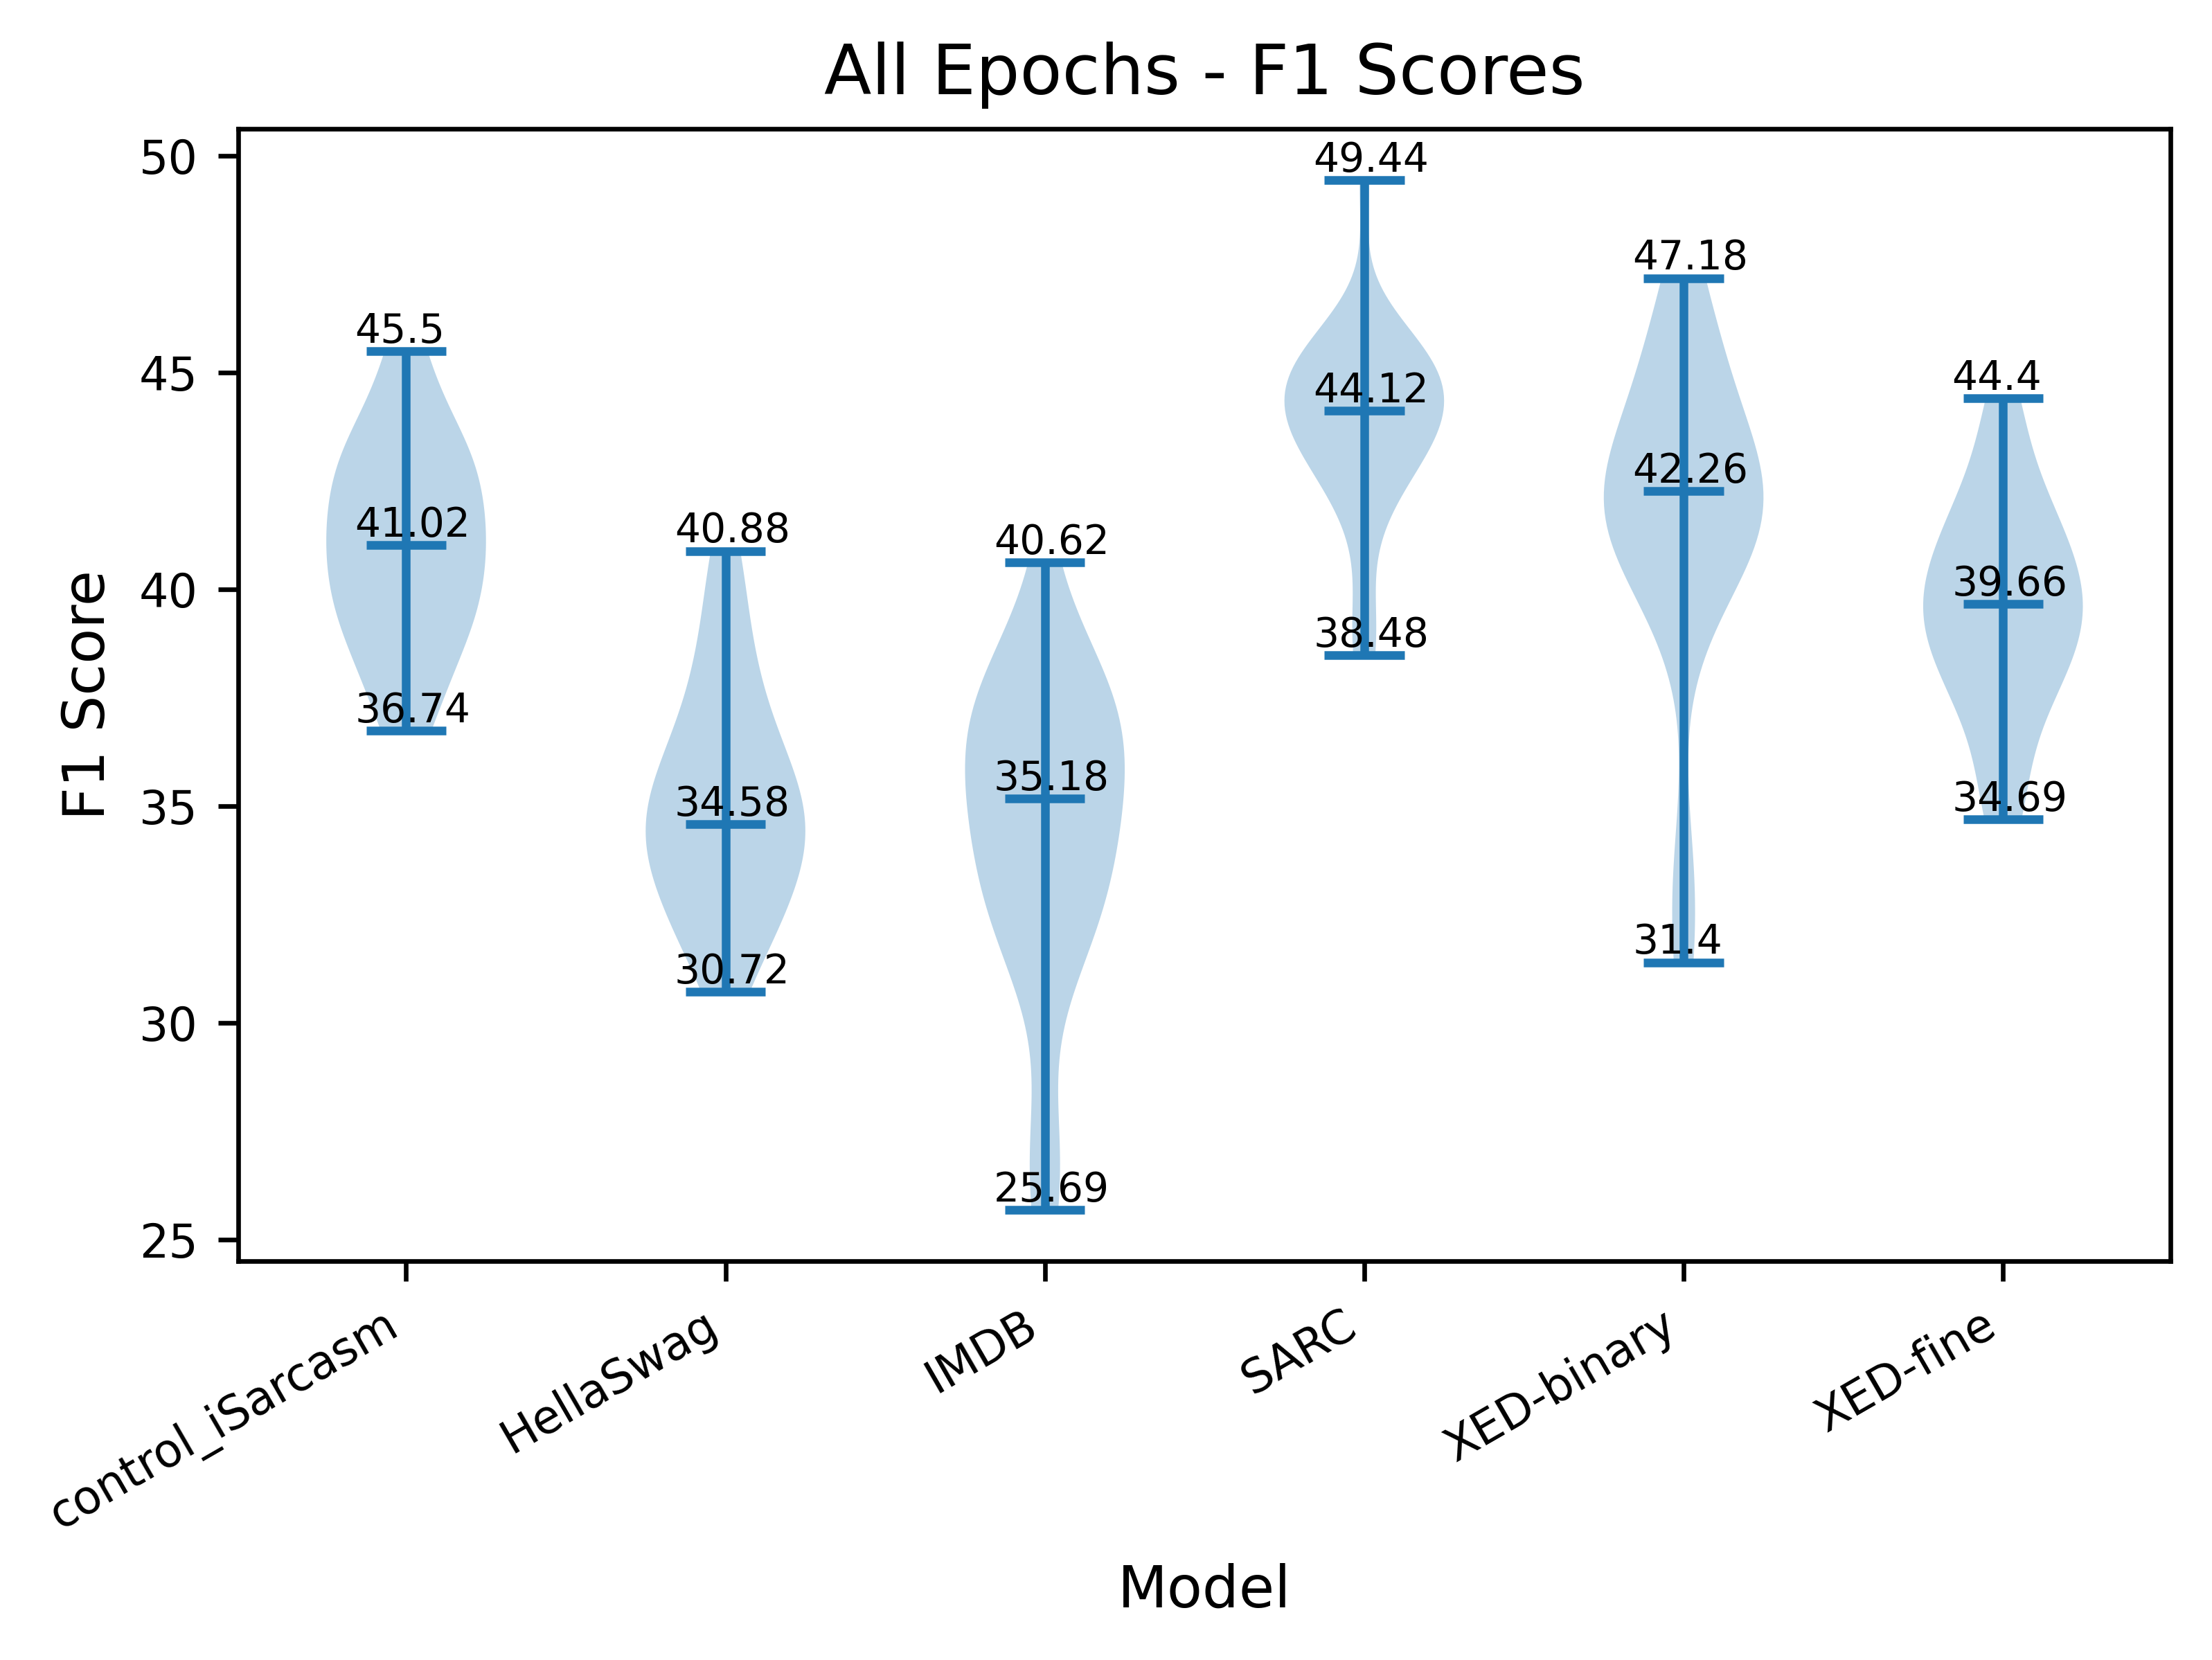

In [8]:
plot_viola(results_df, 'test_f1', 'All Epochs - F1 Scores', 'Model', "F1 Score")

### Accuracy Scores

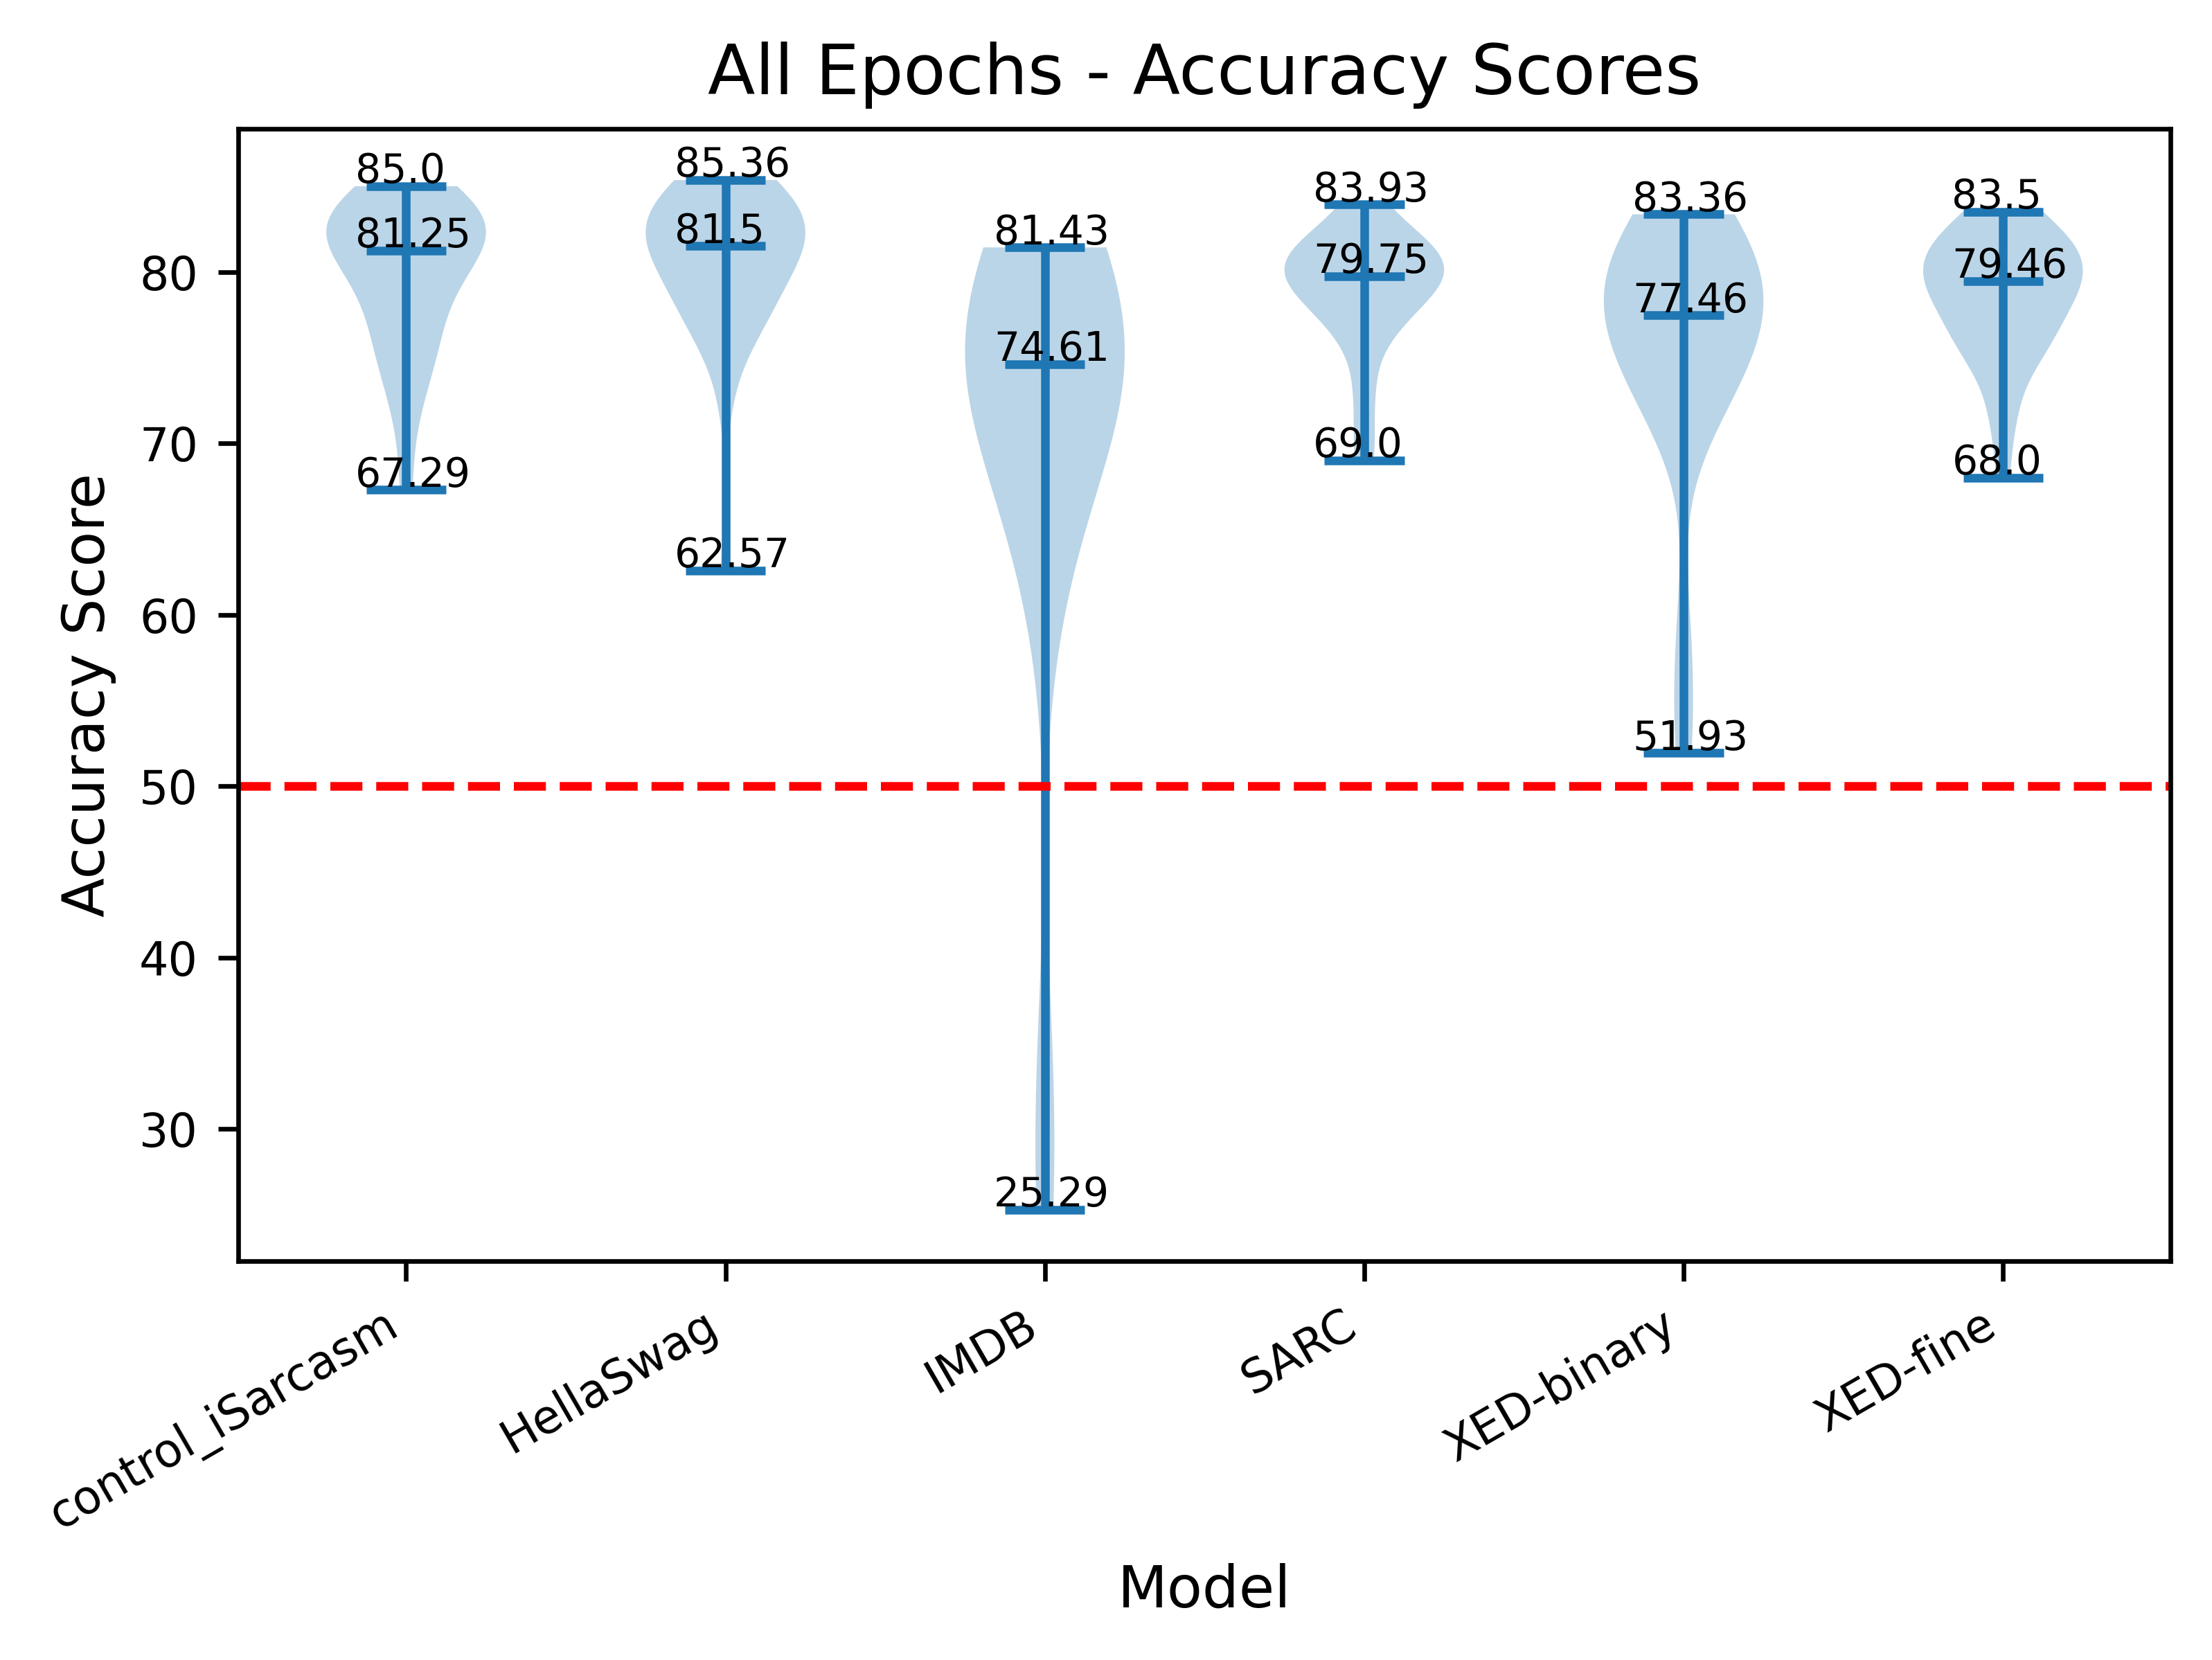

In [9]:
plot_viola(results_df, 'test_accuracy', 'All Epochs - Accuracy Scores', 'Model', "Accuracy Score", display_hline=True)

## Plot Best Epochs by F1

In [ ]:
# get only best epochs from each model
idx = results_df.groupby(['model_name'])['test_f1'].transform(max) == results_df['test_f1']
best_f1_df = results_df[idx]


best_f1_df = best_f1_df.reset_index(drop=True)
best_f1_df

In [ ]:
plot_box(best_f1_df, 'test_f1', 'Best Epochs - F1 Scores')

# BIG NOTE, THIS IS CURRENTLY BEST EPOCH BY F1, MAYBE DESPLAY BEST EPOCH BY ACC?

In [ ]:
plot_box(best_f1_df, 'test_accuracy', 'Best Epochs - Accuracy Scores', display_hline=True)

## Plot Best Epochs by Accuracy

In [ ]:
# get only best epochs from each model
idx = results_df.groupby(['model_name'])['test_accuracy'].transform(max) == results_df['test_accuracy']
best_acc_df = results_df[idx]


best_acc_df = best_acc_df.reset_index(drop=True)
best_acc_df

In [ ]:
plot_box(best_acc_df, 'test_f1', 'Best Epochs by Accuracy - F1 Scores')

In [ ]:
plot_box(best_acc_df, 'test_accuracy', 'Best Epochs by Accuracy - Accuracy Scores', display_hline=True)

## Prediction Similarities

The following heatmap compares each model's predictions with the others and assigns a score on a 0-1 scale, with 1 representing predictions that match each other perfectly.  

### Prep Data 

In [ ]:
# TODO best df is results_df with all but the best epochs per model filtered out.

idx = results_df.groupby(['model_name'])['test_f1'].transform(max) == results_df['test_f1']

best_df = results_df[idx]

best_df.head()

In [ ]:

rows = []

for index_1, row_1 in best_df.iterrows():
    values = []
    values.append(row_1['model_name'])
    # print(index_1, row_1['model_name'], row_1['test_f1'])

    for index_2, row_2 in best_df.iterrows():
        values.append(accuracy_score(row_1['predictions'], row_2['predictions']))
        # print("\t", index_2, row_2['model_name'], row_2['test_f1'])
    rows.append(values)

In [ ]:
rows[0][1:]

In [ ]:
models = best_df['model_name'].values

my_index = pd.MultiIndex(levels=[[]],
                         codes=[[]],
                         names=[u'model'])
my_index

my_columns = models 
heat_df = pd.DataFrame(index=my_index, columns=my_columns)

# add data
for i in rows:
    heat_df.loc[(i[0]),:] = i[1:]
# heat_df.loc[('target-iSarcasm_inter-XED-binary_02'),:] = rows[[1:]]

heat_df

### Plot Heatmap

In [ ]:
heat_df = heat_df.sort_values(by = 'model')
heat_df = heat_df[sorted(heat_df)]
heat_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 8), dpi=600)
# mask = np.triu(np.ones_like(heat_df))
# sns.heatmap(heat_df, annot=True, mask=mask)
sns.heatmap(heat_df, annot=True, cmap='coolwarm')
plt.yticks(rotation=0, weight='bold') 
plt.xticks(rotation=30, horizontalalignment='right', weight='bold')

plt.xlabel("", fontsize=10)
plt.ylabel("", fontsize=10)
    
# add title
# plt.title("Model Prediction Similarities", fontsize=14)
plt.show()